# Notebook Instructions
<i>You can run the notebook document sequentially (one cell at a time) by pressing <b>shift + enter</b>. While a cell is running, a [*] will display on the left. When it has been run, a number will display indicating the order in which it was run in the notebook [8].</i>

<i>Enter edit mode by pressing <b>`Enter`</b> or using the mouse to click on a cell's editor area. Edit mode is indicated by a green cell border and a prompt showing in the editor area.</i> <BR>
    
This course is based on specific versions of python packages. You can find the details of the same in <a href='https://quantra.quantinsti.com/quantra-notebook' target="_blank" >this manual</a>. The manual also explains how to use these codes in other versions of python packages. <BR>

# Relative Series

Relative series is used to compare stocks from different countries. The stocks from different countries are affected by their respective exchange rates and the underlying bullish or bearishness of the index of that country.

To calculate the relative series, three distinct data sets are required: 

1. Stock data, containing the OHLC prices 
2. Benchmark
3. Currency exchange rate 


The most popular method to calculate the relative series is to divide the Open, High, Low and, Close prices (OHLC) data of stock by the close price of the benchmark and the exchange rate. 
And, then rebase the series to the first value of the stock price.

The notebook is divided into the following parts:
1.  Import Data
2.  Join Dataset
3.  Create an adjustment factor
4.  Create a relative series
5.  Create a rebased series


And, also towards the end of the notebook, you will learn to create a function that will return the rebased series.

## Import libraries

In [36]:
# For data manipulation
import pandas as pd
import numpy as np

# To plot
import matplotlib.ticker as ticker
import matplotlib.pyplot as plt

%matplotlib inline

## Import data

We will first import the data (Benchmark data: SP500, Forex data: USDGBP and Stock data: Bank of America, BAC) from Jan-2010 to Jan-2019. Further, we plot these dataframes using matplotlib to check whether the data is accurate or has any outliers.

### File names: 
1. BAC_Jan_2010_to_Jan_2019.csv, contains stock data for 'Bank of America'
2. USDGBP_Jan_2010_to_Jan_2019.csv, contains forex data for 'USDGBP'
3. SP500_Jan_2010_to_Jan_2019.csv, contains benchmark data for 'SP500'

This data is available in the last unit of this course. You can find this file in the downloadables section of the course. 

You create a function 'read_data'. This function reads comma-separated values(CSV) files from the path provided into the dataframe using 'pandas.read_csv'. Also, the function will plot Price Vs Time graphs. 

In [37]:
# The function 'read_data' will read csv files into a dataframe and plot the graphs
def read_data(file_name, column_name, y_label, title_name):
    # Data is stored in the directory 'data_modules' 
    relative_path = "../data_modules/"
    dataframe = pd.read_csv(relative_path+file_name +
                            '.csv', index_col=0, parse_dates=True)
    file_name = dataframe[column_name].plot(figsize=(10, 7))
    plt.title(title_name, fontsize=16)
    plt.ylabel(y_label, fontsize=14)
    plt.xlabel('Date', fontsize=14)
    # Add legend to the plot
    plt.legend()
    # Add grid to the plot
    plt.grid()
    # Display the graph
    plt.show()

    return dataframe

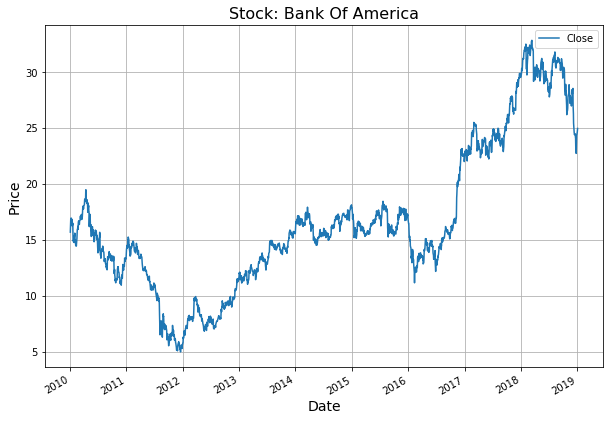

In [38]:
# Read Bank Of America stock data using the function 'read_data'
stock = read_data('BAC_Jan_2010_to_Jan_2019',
                  'Close', 'Price', 'Stock: Bank Of America')

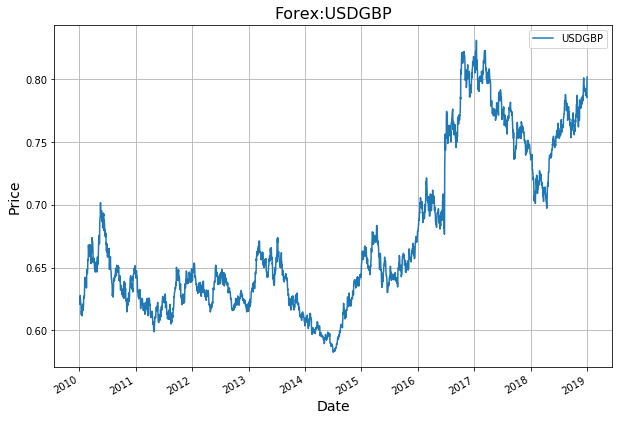

In [39]:
# Read 'USDGBP' forex data using the function 'read_data'
forex = read_data(
    'USDGBP_Jan_2010_to_Jan_2019', 'USDGBP', 'Price', 'Forex:USDGBP')

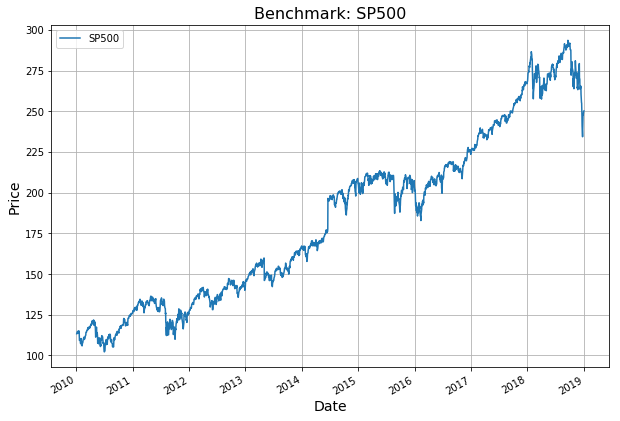

In [40]:
# Read 'SP500' benchmark data using the function 'read_data'
benchmark = read_data(
    'SP500_Jan_2010_to_Jan_2019', 'SP500', 'Price', 'Benchmark: SP500')

##  Join datasets

Once all the three dataframes (benchmark, forex, and stock dataframes) are imported. We concatenate stock, forex and benchmark dataframes using the 'pd.concat([dataframe1, dataframe2, dataframe3, axis=1])'.
Like shown here:

In [41]:
# The function 'pd.concat([dataframe1, dataframe2, dataframe3, axis=1])' concatenates the three dataframes
data = pd.concat([stock, forex, benchmark], axis=1)

# Drops NaN values from the dataset
data.dropna(inplace=True)

# Returns the top 2 rows of the dataframe
data.head(2)

,Open,High,Low,Close,USDGBP,SP500
Date,,,,,,
2010-01-04,15.24,15.75,15.12,15.69,0.620732,113.33
2010-01-05,15.74,16.21,15.70,16.20,0.625391,113.63


## Adjustment factor

The adjustment factor, in this case, is obtained by multiplying the SP500 benchmark index with the USDGBP exchange rate. Since currencies tend to have a lot of decimals, it is preferable to limit the number of decimals by rounding the product to 2.

In [42]:
# Calculate the product of benchmark and currency using '*'
data['adjustment_factor'] = forex['USDGBP']*benchmark['SP500']

# Returns the top 2 rows of the dataframe
data.head(2)

,Open,High,Low,Close,USDGBP,SP500,adjustment_factor
Date,,,,,,,
2010-01-04,15.24,15.75,15.12,15.69,0.620732,113.33,70.347610
2010-01-05,15.74,16.21,15.70,16.20,0.625391,113.63,71.063164


## Relative series

We calculate the relative series by dividing the OHLC price data with the adjustment factor.

In [43]:
# Calculate relative open
data['relative_open'] = data['Open']/data['adjustment_factor']
# Calculate relative high
data['relative_high'] = data['High']/data['adjustment_factor']
# Calculate relative low
data['relative_low'] = data['Low']/data['adjustment_factor']
# Calculate relative close
data['relative_close'] = data['Close']/data['adjustment_factor']

# Returns the top 2 rows of the dataframe
data.head(2)

,Open,High,Low,Close,USDGBP,SP500,adjustment_factor,relative_open,relative_high,relative_low,relative_close
Date,,,,,,,,,,,
2010-01-04,15.24,15.75,15.12,15.69,0.620732,113.33,70.347610,0.216638,0.223888,0.214933,0.223035
2010-01-05,15.74,16.21,15.70,16.20,0.625391,113.63,71.063164,0.221493,0.228107,0.220930,0.227966


##  Rebased series

 We rebase the relative series to the first value of the stock price. We do this by multiplying the whole relative series column with the first value of the adjustment factor.

In [44]:
# Calculate rebased open
data['rebased_open'] = data['relative_open']*data['adjustment_factor'].iloc[0]
# Calculate rebased high
data['rebased_high'] = data['relative_high']*data['adjustment_factor'].iloc[0]
# Calculate rebased low
data['rebased_low'] = data['relative_low']*data['adjustment_factor'].iloc[0]
# Calculate rebased close
data['rebased_close'] = data['relative_close']*data['adjustment_factor'].iloc[0]

In [45]:
# Round all the values in the dataset upto two decimal places
data= round(data,2)

# Returns the top 2 rows of the dataframe 
data.head(2)

,Open,High,Low,Close,USDGBP,SP500,adjustment_factor,relative_open,relative_high,relative_low,relative_close,rebased_open,rebased_high,rebased_low,rebased_close
Date,,,,,,,,,,,,,,,
2010-01-04,15.24,15.75,15.12,15.69,0.62,113.33,70.35,0.22,0.22,0.21,0.22,15.24,15.75,15.12,15.69
2010-01-05,15.74,16.21,15.70,16.20,0.63,113.63,71.06,0.22,0.23,0.22,0.23,15.58,16.05,15.54,16.04


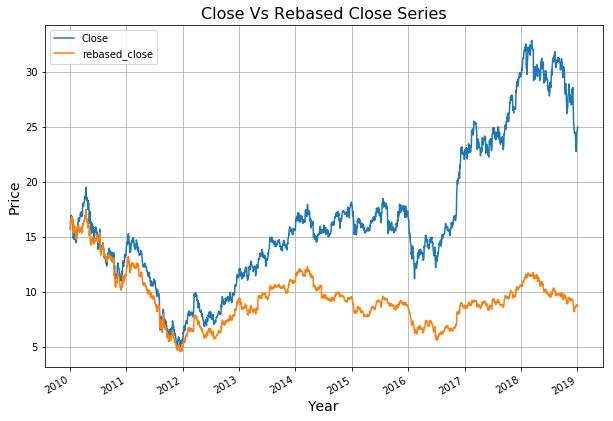

In [46]:
# Plot BAC's Close price against the rebased close price.
data[['Close', 'rebased_close']].plot(figsize=(10, 7))
plt.title('Close Vs Rebased Close Series', fontsize=16)
plt.ylabel('Price', fontsize=14)
plt.xlabel('Year', fontsize=14)
# Add legend on the plot
plt.legend()
# Add the grid 
plt.grid()
# Display the graph
plt.show()

##  Create a relative series function


All the four steps i.e.
1. Combine stock, benchmark and forex dataframe
2. Create an adjustment factor
3. Create a relative series
4. And, create a rebased series
can be put down together by creating a Relative Series function, 'relative'. The parameters for this function are as below.

        '''
        stock_dataframe: Stock dataframe, Bank of America 
        benchmark_dataframe: Benchmark dataframe, SP500 
        benchmark_name: Column in the benchmark dataframe, ['SP500']
        forex_dataframe: Forex dataframe, USDGBP
        forex_name: Column in the forex dataframe, ['USDGBP']
        decimals: Rounding decimals, 2
        start: Start date
        end: End date
        
         '''
         

This function slices a stock dataframe into a start date and end date. It takes two different dataframes: benchmark and currency join them with stock dataframe. The adjustment factor creates relative OHLC columns. Absolute prices are divided by the close of the benchmark and forex. And then it is rebased at the start.


This function created below will be stored in a 'short_selling' library. All the functions created in the upcoming notebooks will also get stored in the same 'short_selling' library. This 'short_selling.py' file will be available in the last unit of this course. You can find this 'short_selling.py' file in the downloadables section of the course.  

In [47]:
def relative(stock_dataframe, benchmark_dataframe, benchmark_name, forex_dataframe, forex_name, decimals, start, end):

    # Slice dataframe from start to end period: either offset or datetime
    stock_dataframe = stock_dataframe[start:end]

    # Join the dataset: Concatenation of benchmark, stock & currency
    data = pd.concat([stock_dataframe, forex_dataframe,
                      benchmark_dataframe], axis=1, sort=True).dropna()

    # Adjustment factor: Calculate the product of benchmark and currency
    data['adjustment_factor'] = data[benchmark_name]*(data[forex_name])

    # Relative series: Calculate the relative series by dividing the OHLC stock data with the adjustment factor
    data['relative_open'] = data['Open']/data['adjustment_factor']
    data['relative_high'] = data['High']/data['adjustment_factor']
    data['relative_low'] = data['Low']/data['adjustment_factor']
    data['relative_close'] = data['Close']/data['adjustment_factor']

    # Rebased series: Multiply relative series with the first value of the adjustment factor to get the rebased series
    data['rebased_open'] = data['relative_open']*data['adjustment_factor'].iloc[0]
    data['rebased_high'] = data['relative_high']*data['adjustment_factor'].iloc[0]
    data['rebased_low'] = data['relative_low']*data['adjustment_factor'].iloc[0]
    data['rebased_close'] = data['relative_close']*data['adjustment_factor'].iloc[0]

    # Rounds values upto 2 decimal places
    decimals = 2
    data = round(data, decimals)
    
    return (data)

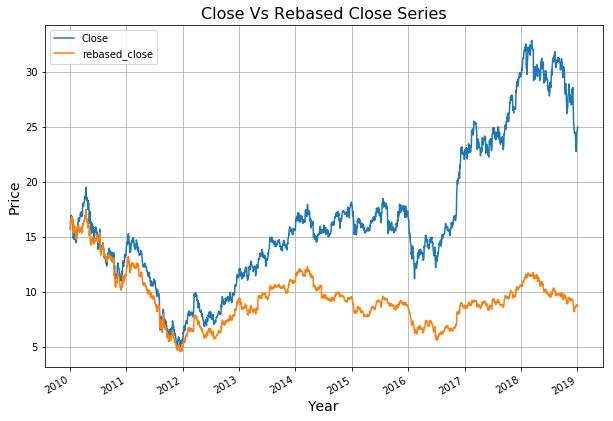

In [48]:
# Call the function to calculate the relative series
relative_series = relative(stock_dataframe=stock, benchmark_dataframe=benchmark, benchmark_name='SP500',
                         forex_dataframe=forex, forex_name='USDGBP', decimals=2, start=None, end=None)
relative_series[['Close', 'rebased_close']].plot(figsize=(10, 7))
plt.title('Close Vs Rebased Close Series', fontsize=16)
plt.ylabel('Price', fontsize=14)
plt.xlabel('Year', fontsize=14)
# Add a grid
plt.grid()

## Conclusion

The calculated rebased series will be used in the upcoming notebooks.
In the next unit, you will learn how to calculate the returns and cumulative returns using this rebased series in IPython notebooks.
</span> <BR><BR>